In [1]:
# Initial Setup

from splinter import Browser
from bs4 import BeautifulSoup as bs
from webdriver_manager.chrome import ChromeDriverManager
import requests
import pandas as pd

##### 1.	Create a python function to scrape Yelp data for 50 restaurants close to you OR Craigslist for the top 50 items of any topic interesting to you. Think about what data you want to scrape aside from the name and location. You must pick at least three other fields. You can use beautiful soup, selenium, scrapy, and/or splinter as possible.

Go to the scraper_app folder and open scraper_func.py file to see code exclusive to this question.  

The code below is simply the process I went through to get to the finished product.

In [2]:
url ='https://stlouis.craigslist.org/search/fua?query=mid-century'

#get page response
response = requests.get(url)
response

<Response [200]>

In [3]:
response.text
soup = bs(response.text,'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width,initial-scale=1" name="viewport"/>
  <meta content="craigslist" property="og:site_name"/>
  <meta content="preview" name="twitter:card"/>
  <meta content='st louis furniture "mid-century" - craigslist' property="og:title"/>
  <meta content='st louis furniture "mid-century" - craigslist' name="description"/>
  <meta content='st louis furniture "mid-century" - craigslist' property="og:description"/>
  <meta content="https://stlouis.craigslist.org/search/fua?query=mid-century" property="og:url"/>
  <meta content="true" name="smartbanner:api"/>
  <meta content="the craigslist app" name="smartbanner:title"/>
  <meta content="what's old is new" name="smartbanner:author"/>
  <meta content="/images/app_icon.png" name="smartbanner:icon-apple"/>
  <meta content="/images/app_icon.png" name="smartbanner:icon-google"/>
  <meta content="view" name="sma

In [4]:
# get the div class = result-row
furn_divs = soup.find_all('li',class_='result-row')
furn_divs

[<li class="result-row" data-pid="7454333281">
 <a class="result-image gallery" data-ids="3:00606_39PzFI2dyShz_0ww0oo,3:00h0h_7TPuLSK9aTuz_0ww0oo,3:00A0A_16y5vzQ3I3Bz_0ww0oo,3:01212_iQ3i9A2OD0Hz_0ww0oo,3:00J0J_lOmykc41FEUz_0ww0oo,3:00J0J_8JngFOLABfxz_0ww0oo,3:00C0C_6r82EEPt588z_0ww0oo,3:00202_iHzbWuoaEFPz_0ww0oo,3:00q0q_1gCMJ1GONG5z_0ww0oo" href="https://stlouis.craigslist.org/fuo/d/maryland-heights-broyhill-sculptra-mid/7454333281.html">
 <span class="result-price">$295</span>
 </a>
 <div class="result-info">
 <span class="icon icon-star" role="button">
 <span class="screen-reader-text">favorite this post</span>
 </span>
 <time class="result-date" datetime="2022-03-05 14:44" title="Sat 05 Mar 02:44:04 PM">Mar  5</time>
 <h3 class="result-heading">
 <a class="result-title hdrlnk" data-id="7454333281" href="https://stlouis.craigslist.org/fuo/d/maryland-heights-broyhill-sculptra-mid/7454333281.html" id="postid_7454333281">BROYHILL SCULPTRA MID-CENTURY MODERN NIGHTSTAND WITH DRAWER</a>
 <

In [5]:
first_fifty_furn=[]

for mcm_furn in furn_divs[:50]:
    try:
        #find the item name
        furn_title = mcm_furn.find('a', class_='result-title hdrlnk').text
        #print(furn_title)
        
        #find the date item was posted
        furn_date = mcm_furn.find('time', class_='result-date').text
        #print(furn_date)
        
        #find the item price
        furn_price = mcm_furn.find('span', class_="result-price").text
        #print(furn_price)
        
        #find the seller location
        furn_loc = (mcm_furn.find('span', class_="result-hood").text)[2:-2]
        #print(furn_loc)
        
        #find the listing link
        furn_link = mcm_furn.find('a')['href']
        #print(furn_link)
        
        furn_dict = {'Item Name':furn_title,
                       'Date Posted':furn_date,
                       'Price':furn_price,
                     'Seller Location':furn_loc,
                    'Web Link':furn_link}
        
        first_fifty_furn.append(furn_dict)
    except AttributeError as e:
        print(e)
        
first_fifty_furn_df = pd.DataFrame(first_fifty_furn)
first_fifty_furn_df

,Item Name,Date Posted,Price,Seller Location,Web Link
0,BROYHILL SCULPTRA MID-CENTURY MODERN NIGHTSTAN...,Mar 5,$295,,https://stlouis.craigslist.org/fuo/d/maryland-...
1,Mersman mid-century end table,Mar 5,$30,Florissant,https://stlouis.craigslist.org/fuo/d/florissan...
2,Garrison Mid-Century Danish Modern Dining Tabl...,Mar 5,$195,,https://stlouis.craigslist.org/fuo/d/maryland-...
3,DREXEL INTERMEZZO MID-CENTURY MODERN NIGHTSTAN...,Mar 4,$295,,https://stlouis.craigslist.org/fuo/d/maryland-...
4,KENT COFFEY PERSPECTA MID-CENTURY MODERN GENTL...,Mar 4,"$1,695",,https://stlouis.craigslist.org/fuo/d/maryland-...
5,KENT COFFEY PERSPECTA MID-CENTURY MODERN WALL ...,Mar 4,$595,,https://stlouis.craigslist.org/fuo/d/maryland-...
6,MID-CENTURY DINING CHAIR (6) ~ STYLE OF EDWARD...,Mar 4,"$2,400",,https://stlouis.craigslist.org/fuo/d/maryland-...
7,MID-CENTURY BUTTON TUFTED BARREL LOUNGE CHAIR ...,Mar 4,$795,,https://stlouis.craigslist.org/fuo/d/maryland-...
8,DREXEL INTERMEZZO MID-CENTURY MODERN 5-DRAWER ...,Mar 4,$795,,https://stlouis.craigslist.org/fuo/d/maryland-...
9,Mid-Century Octagonal Wood Side Table/Cabinet,Mar 3,$50,Chesterfield,https://stlouis.craigslist.org/fuo/d/chesterfi...


##### 2.	Create a local API that calls your scrape function and stores the data when you call /scrape endpoint. The data you scrape should be viewable when you go to /all .

Go to scraper_app folder for scraper.py file, index.html file, first_fifty.csv file, and screenshots of the resulting views.

##### 3.	What is web scraping? Why is it helpful? What does it mean for your online presence?  Reference the readings and DataCamp. 


Web scraping is a systematic way of extracting data from websites.  The process is automated through code and is an efficient way for businesses to inform their decisions regarding their products, their customer base, and their online presence.  Companies can glean useful information from web scraping, such as competitor pricing on similar items, customer perception of their services (if scraping is used in conjunction with Natural Language Processing), or using Machine Learning alongside web scraping to make predictions about future outcomes, which in turn allows for more informed decision making about long terms goals for the business.

### DataCamp

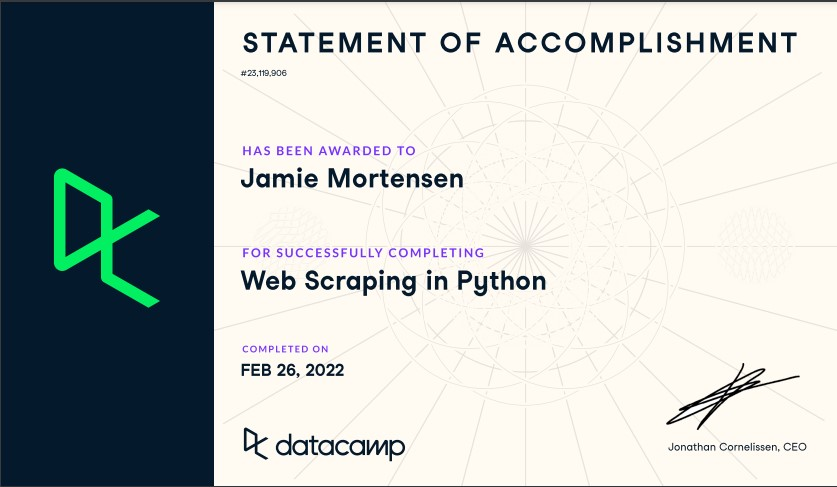

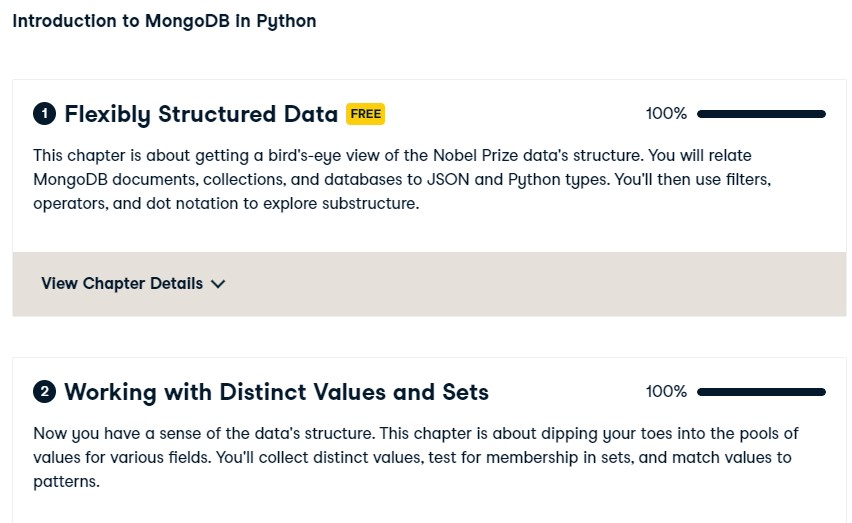